## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



In [1]:
import numpy as np

def metodo_bisezione(fname, a, b, tolx, tolf, maxit):
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa) * np.sign(fb) > 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None
    
    it = 0
    v_xk = []
    xk_prec = None
    xk = a
    fxk = tolf + 1.0
    errore = tolx + 1.0

    while (
        it < maxit and
        np.abs(fxk) > tolf and
        errore > tolx
    ):
        xk_prec = xk
        xk = a + ((b - a) / 2) # più stabile rispetto (b + a) / 2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
        if np.sign(fb) * np.sign(fxk) < 0: # la radice si trova nell'intervallo [xk, b]
            a = xk
            fa= fxk 
        elif np.sign(fa) * np.sign(fxk) < 0:  # la radice si trova nell'intervallo [a, xk]
            b = xk
            fb= fxk

        errore = np.abs(xk - xk_prec) / (np.abs(xk) if xk != 0 else 1)
        
    return xk, it, np.array(v_xk)

def falsa_posizione(fname,a,b,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa) * np.sign(fb) > 0:
       print("Metodo di regula falsi non applicabile")
       return None,None,None

    it=0
    v_xk=[]
    fxk=1+tolf
    errore=1+tolx
    xk_prec=None
    xk = a
    
    while (
        it < maxit and
        np.abs(fxk) > tolf and
        errore > tolx
    ):
        xk_prec = xk
        xk= a - fa * ((b - a) / (fb - fa))
        v_xk.append(xk)
        it+=1
        fxk= fname(xk)
        if fxk==0:
            return xk,it,v_xk

        if np.sign(fa) * np.sign(fxk) < 0: # la radice si trova nell'intervallo [a, xk]
           b= xk
           fb= fxk
        elif np.sign(fb) * np.sign(fxk) < 0: # la radice si trova nell'intervallo [xk, b]
           a= xk
           fa= fxk
        errore= np.abs(xk - xk_prec) / (np.abs(xk) if xk != 0 else 1.0)
    return xk,it,np.array(v_xk)

**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


Scegli funzione [1-4] 2


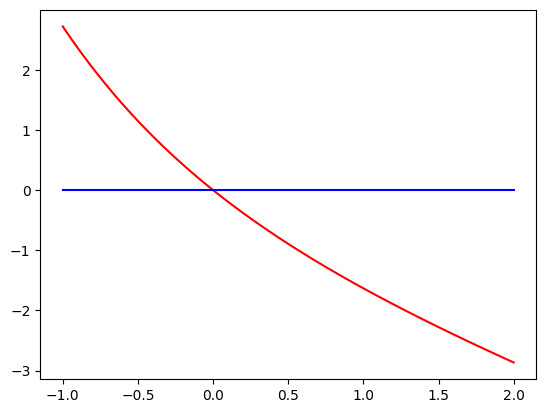

alfa: 0
bisezione: 4.547473508864641e-13 41
regula falsi: 3.2573943542502093e-13 22


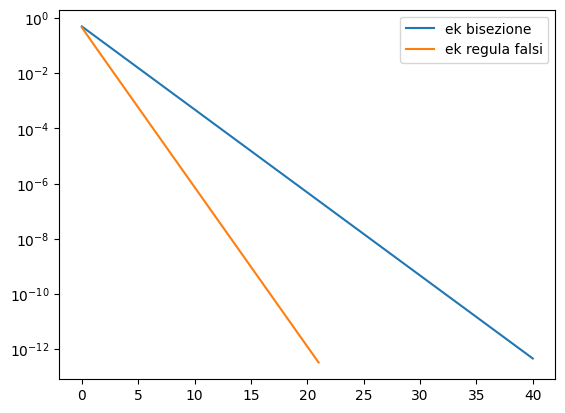

In [2]:
import numpy as np
import matplotlib.pyplot as plt

opt = int(input("Scegli funzione [1-4]"))
match opt:
    case 1:
        f = lambda x: x**3 -6*x**2 -4*x +24
        a = -3
        b = 8
        tolx = 1.e-12
        tolf = 1.e-12
        alfa = (-2, 2, 6)
    case 2:
        f = lambda x: np.exp(-x) - (x + 1)
        a = -1
        b = 2
        tolx = 1.e-12
        tolf = 1.e-12
        alfa = 0
    case 3:
        f = lambda x: np.log2(x + 3) - 2
        a = -1
        b = 2
        tolx = 1.e-12
        tolf = 1.e-12
        alfa = 1
    case 4:
        f = lambda x: np.sqrt(x) - (x**2)/4
        a = 1
        b = 3
        tolx = 1.e-12
        tolf = 1.e-12
        alfa = 2**(4/3)

maxit = 1000
x = np.linspace(a, b, 100)
plt.plot(x, f(x), "r")
plt.plot(x, np.zeros_like(x), "b")
plt.show()

bis_xk, bis_it, bis_vxk = metodo_bisezione(f, a, b, tolx, tolf, maxit)
falsi_xk, falsi_it, falsi_vxk = falsa_posizione(f, a, b, tolx, tolf, maxit)
print("alfa:", alfa)
print("bisezione:", bis_xk, bis_it)
print("regula falsi:", falsi_xk, falsi_it)
if not isinstance(alfa, tuple):
    bis_ek = np.abs(bis_vxk - alfa)
    falsi_ek = np.abs(falsi_vxk - alfa)
    plt.semilogy(range(bis_ek.size), bis_ek)
    plt.semilogy(range(falsi_ek.size), falsi_ek)
    plt.legend(["ek bisezione", "ek regula falsi"])
    plt.show()

## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

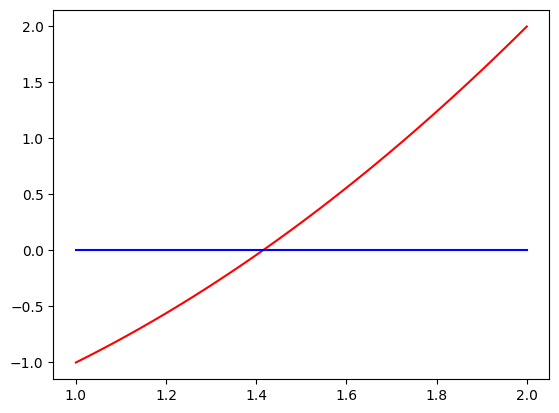

radice di 2 (bisezione) 1.4142135623733338
alfa: 1.4142135623730951


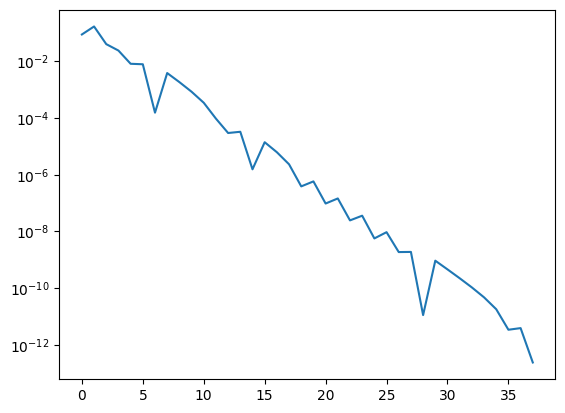

In [139]:
import numpy as np

f = lambda x: x**2 - 2 # sqrt(2) è la soluzione di x^2 = 2 e quindi radice di x^2 - 2

a = 1
b = 2
x = np.linspace(a, b, 100)
plt.plot(x, f(x), "r")
plt.plot(x, np.zeros_like(x), "b")
plt.show()

rad_2, it, vxk = metodo_bisezione(f, a, b, 1.e-12, 1.e-12, 1000) # sqrt(2) è sicuramente < 2
alfa = np.sqrt(2)
print("radice di 2 (bisezione)", rad_2)
print("alfa:", alfa)

ek = np.abs(vxk - alfa)
plt.semilogy(range(it), ek)
plt.show()

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [140]:
import numpy as np

def norma_infinito(A):
    return np.max(np.sum(np.abs(A), axis=1))

def norma_1(A):
    return np.max(np.sum(np.abs(A), axis=0))

A = np.floor(np.random.random_sample((2, 3)) * 11 - 5)
print(A)
print("norma infinito:", norma_infinito(A))
print("norma infinito (numpy):", np.linalg.norm(A, np.inf))
print("norma 1:", norma_1(A))
print("norma 1 (numpy):", np.linalg.norm(A, 1))

[[ 2.  4.  5.]
 [-4.  4. -2.]]
norma infinito: 11.0
norma infinito (numpy): 11.0
norma 1: 8.0
norma 1 (numpy): 8.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [141]:
import numpy as np

def norma_2(A):
    return np.sqrt(np.max(np.abs(np.linalg.eigvals(A.T @ A))))

A = np.array([
    [4.0, -1.0, 6.0],
    [2.0, 3.0, -3.0],
    [1.0, -2.0, 9.0/2.0],
])

print("norma 2 (custom):", norma_2(A))
print("norma 2 (numpy):", np.linalg.norm(A, 2))

norma 2 (custom): 9.056251013341882
norma 2 (numpy): 9.056251013341878
